## reference:
https://satijalab.org/seurat/articles/multimodal_reference_mapping#intro-seurat-v4-reference-mapping
### mapping query datasets to annotated references

In [1]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(SeuratDisk)
options(SeuratData.repo.use = "http://seurat.nygenome.org")
# devtools::install_github('satijalab/seurat-data')
library(SeuratData)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [ ]:
library(anndata)
adata <- read_h5ad("../raw_data/pbmc10k_rna.h5ad")
# 提取数据
counts_matrix <- t(as.matrix(adata$X)) 
cell_metadata <- adata$obs
gene_metadata <- adata$var
pbmc_rna <- CreateSeuratObject(
  counts = counts_matrix,
  meta.data = cell_metadata
)
pbmc_rna[["RNA"]]@meta.features <- gene_metadata
SaveH5Seurat(pbmc_rna, filename = "../raw_data/pbmc10k_rna.h5Seurat")

In [2]:
path = './'
reference <- LoadH5Seurat(paste0(path,'/ref_data/pbmc_multimodal.h5seurat'))

pbmc10k <- LoadH5Seurat('../raw_data/pbmc10k_rna.h5Seurat')
DefaultAssay(pbmc10k) <- "RNA"
pbmc10k <- SCTransform(pbmc10k, verbose = FALSE)

anchors <- FindTransferAnchors(
  reference = reference,
  query = pbmc10k,
  normalization.method = "SCT",
  reference.reduction = "spca",
  dims = 1:50                   
)

pbmc10k <- MapQuery(
  anchorset = anchors,
  query = pbmc10k,
  reference = reference,
  refdata = list(
    celltype.l1 = "celltype.l1",
    celltype.l2 = "celltype.l2"
  ),
  reference.reduction = "spca",  
  reduction.model = "wnn.umap"   
)

Validating h5Seurat file

Initializing ADT with data

Adding counts for ADT

Adding variable feature information for ADT

Adding miscellaneous information for ADT

Initializing SCT with data

Adding counts for SCT

Adding variable feature information for SCT

Adding miscellaneous information for SCT

Adding reduction apca

Adding cell embeddings for apca

Adding feature loadings for apca

Adding miscellaneous information for apca

Adding reduction aumap

Adding cell embeddings for aumap

Adding miscellaneous information for aumap

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction spca

Adding cell embeddings for spca

Adding feature loadings for spca

Adding miscellaneous information for spca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding reduction wnn.umap

Adding cell embeddings for wnn.umap

Adding miscellaneous information for w

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



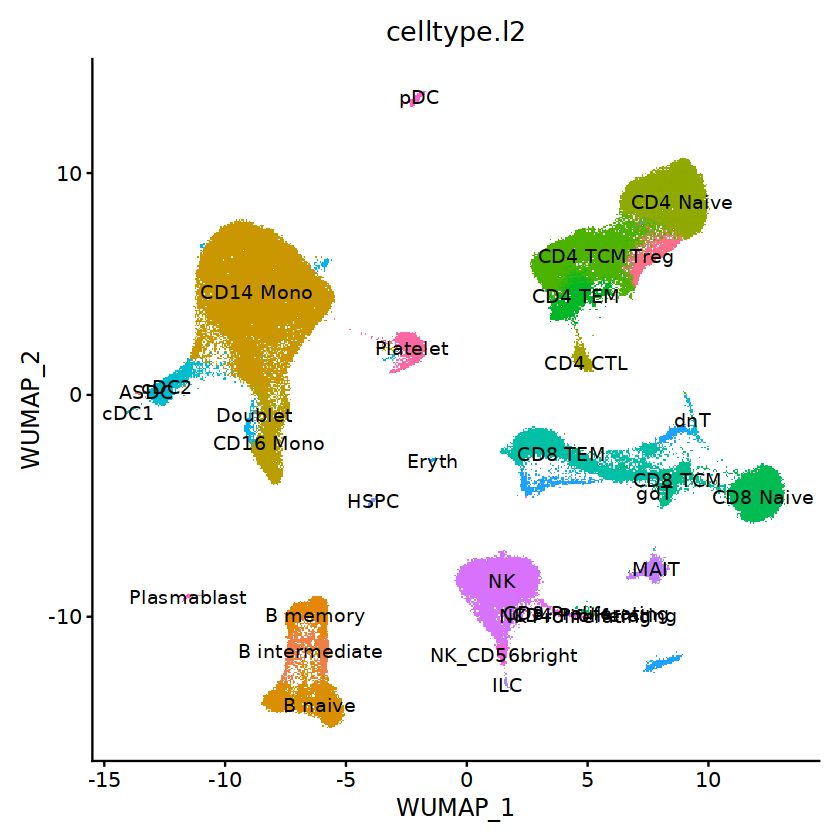

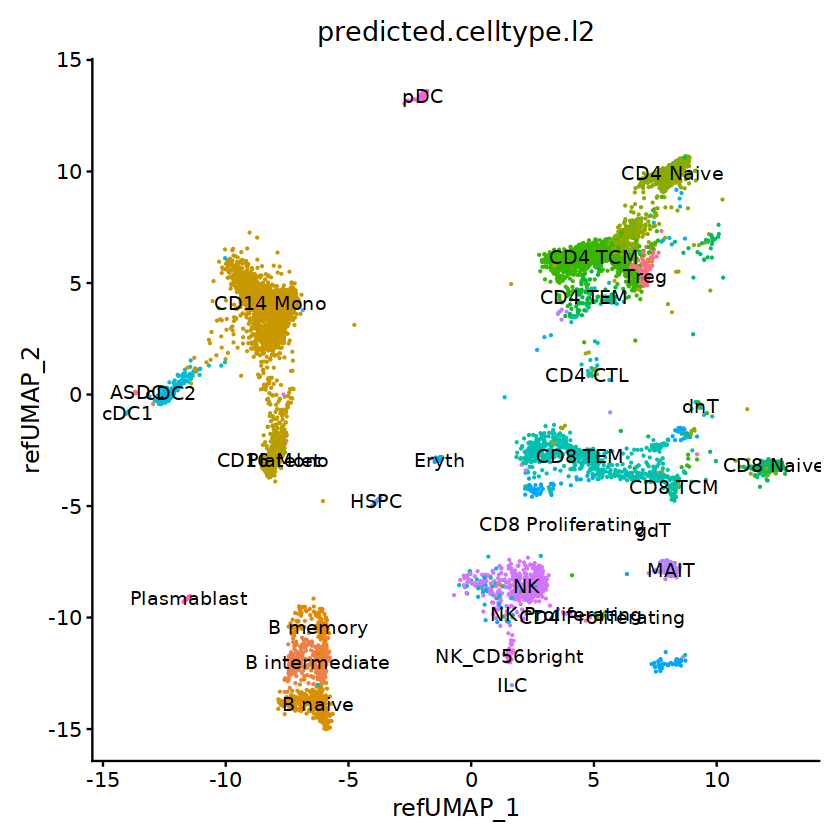

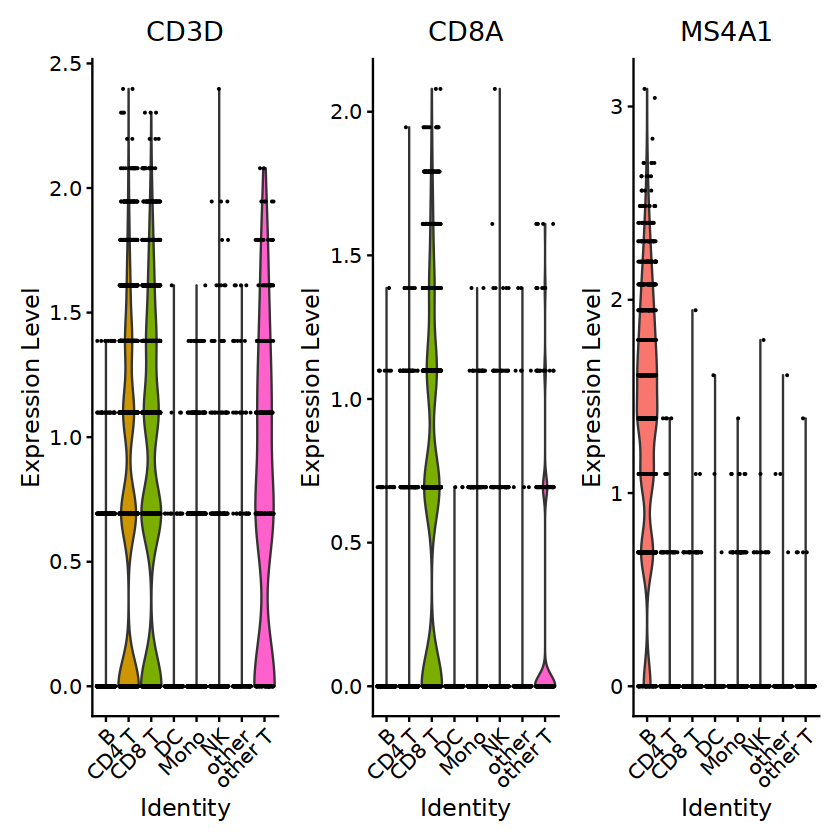

In [3]:
p1 <- DimPlot(reference, reduction = "wnn.umap", group.by = "celltype.l2", label = TRUE) + NoLegend()
p2 <- DimPlot(pbmc10k, reduction = "ref.umap", group.by = "predicted.celltype.l2", label = TRUE) + NoLegend()
p1
p2
VlnPlot(pbmc10k, features = c("CD3D", "CD8A", "MS4A1"), group.by = "predicted.celltype.l1")

Requested to reuse weights matrix, but no weights found. Computing new weights.


Integrating dataset 2 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

17:21:37 UMAP embedding parameters a = 0.9922 b = 1.112

17:21:37 Read 11898 rows and found 50 numeric columns

17:21:37 Using Annoy for neighbor search, n_neighbors = 30

17:21:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:21:39 Writing NN index file to temp file /tmp/RtmpOeF2iS/filee3526278e545

17:21:39 Searching Annoy index using 1 thread, search_k = 3000

17:21:42 Annoy recall = 100%

17:21:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:21:45 Initializing from normalized Laplacian + noise (using irlba)

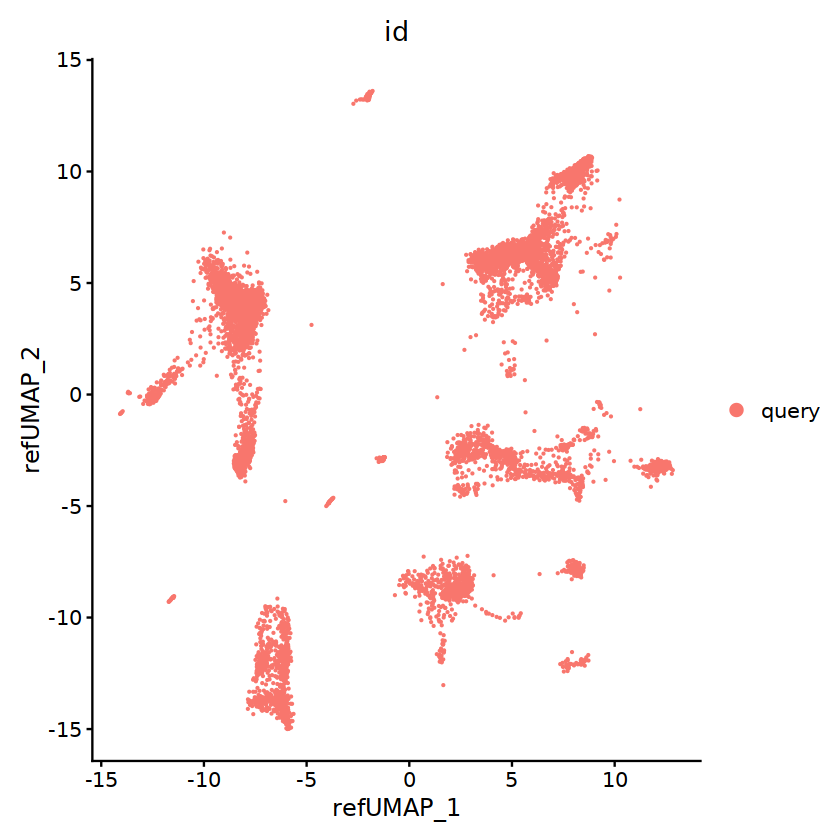

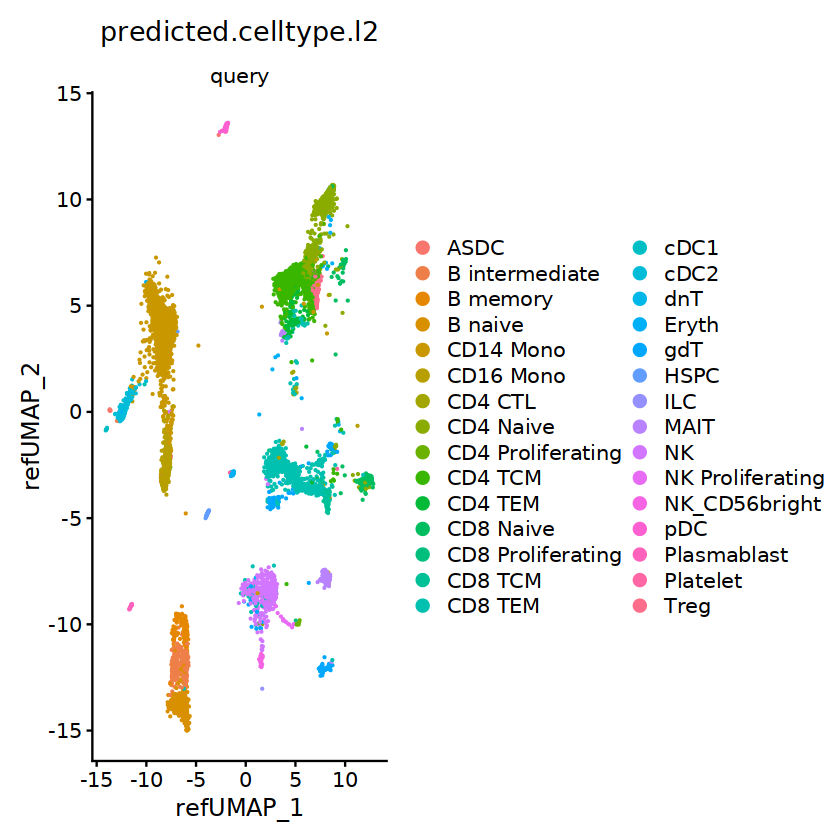

In [4]:
reference$id <- 'reference'
pbmc10k$id <- 'query'

refquery <- merge(reference, pbmc10k)
refquery <- IntegrateEmbeddings(
  anchorset = anchors,
  reference = reference,  
  query = pbmc10k,      
  new.reduction.name = "ref.spca",
  reductions = "pcaproject"
)

refquery <- RunUMAP(refquery, reduction = "ref.spca", dims = 1:50)
DimPlot(refquery, group.by = "id", shuffle = TRUE)  
DimPlot(refquery, group.by = "predicted.celltype.l2", split.by = "id") 

In [5]:
DefaultAssay(pbmc10k) <- "RNA"
# 提取RNA assay和meta.data
rna_seurat <- DietSeurat(
  pbmc10k, 
  assays = "RNA",
  dimreducs = NULL, 
  graphs = NULL
)
rna_seurat[["RNA"]] <- as(object = rna_seurat[["RNA"]], Class = "Assay")
rna_seurat[["RNA"]]$scale.data <- NULL
SaveH5Seurat(rna_seurat, filename = paste0(path,"/pbmc10k_anno.h5Seurat"), overwrite = TRUE)
Convert(paste0(path,"/pbmc10k_anno.h5Seurat"), dest = "h5ad", overwrite = TRUE)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Warning message:
“We cannot save neighbor indexes at this time; please save the index separately”
Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs

